In [1]:
import sys

import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from Bio import SeqIO, Entrez
import Levenshtein

import warnings
warnings.filterwarnings('ignore')

In [2]:
fasta = './Challenge/Challenge.fa'

df = []

for record in SeqIO.parse(fasta, 'fasta'):
    id_part = record.id
    desc_part = record.description
    seq = record.seq
    
    tmp = [id_part, seq]
    
    df.append(tmp)
    
df = pd.DataFrame(df, columns=['id', 'seq'])

print('data size : ', len(df))

data size :  8000


In [3]:
df['target'] = df['id'].str.split('_').apply(lambda x: x[0])

df['seq_str'] = df['seq'].astype(str)
df['seq_len'] = df['seq'].map(len)

print('seq unique count : ', df['seq_str'].nunique())

seq unique count :  7461


In [4]:
# def calc1(s, df):
#     dist = df['seq_str'].apply(lambda x: Levenshtein.distance(s, x))
#     dist = dist[dist!=0]
#     return dist.mean()

# def calc2(df1, df2):
#     return df1['seq_str'].apply(lambda x: calc1(x, df2)).mean()

# n_sample = 10
# target_list = ['B.1.427', 'B.1.1.7', 'P.1', 'B.1.526']
# result = []

# for t1 in target_list:
#     tmp1 = df[df['target']==t1].sample(n=n_sample, random_state=9)
#     result_tmp = []
#     for t2 in target_list:
#         tmp2 = df[df['target']==t2].sample(n=n_sample, random_state=9)
#         r = calc2(tmp1, tmp2)
#         result_tmp.append(r)
#     result.append(result_tmp)
    
# result = pd.DataFrame(result, index=target_list, columns=target_list)

# plt.figure(figsize=(10,10))
# sns.heatmap(result, linewidths=0.1, square=True, cmap=plt.cm.RdBu, annot=True)
# plt.show()

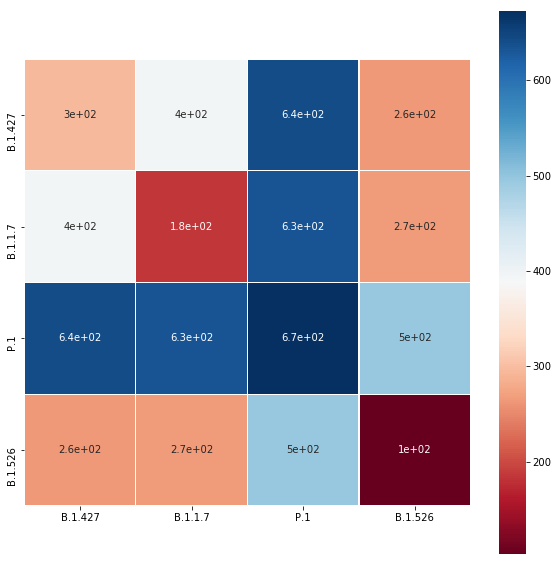

- P.1 は人ごとに遺伝子が大きく異なる
- B... における同タイプの遺伝子配列は似ている
- サンプリングサイズが小さいためデータが確からしくない

In [5]:
# # 相補鎖 なにこれ
# df['seq_complement'] = df['seq'].map(lambda x: x.complement())
# df['seq_complement_str'] = df['seq_complement'].astype(str)

# # 逆相補鎖 なにこれ
# df['seq_rcomplement'] = df['seq'].map(lambda x: x.reverse_complement())
# df['seq_rcomplement_str'] = df['seq_rcomplement'].astype(str)

# 転写
df['seq_transcribe'] = df['seq'].map(lambda x: x.transcribe())
df['seq_transcribe_str'] = df['seq_transcribe'].astype(str)

# 翻訳
df['seq_translate'] = df['seq'].map(lambda x: x.translate())
df['seq_translate_str'] = df['seq_translate'].astype(str)

# print('df size : {:.2f} GB'.format(sys.getsizeof(df) / 1000 / 1000 / 1000))

In [13]:
str(df['seq_transcribe'][0].translate())

'RSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QDTSNSSIFCRLLTVSSVLQPIISTSRFCPGVTER*DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS*RWHLWLSRS*KRRFAST*TALCVHQTFGCSNCTSWSCYG*AGSRTRRHSVRS*W*DTWCPCPSCGRNTSGLPQGSSS*ER**RSWWP*LRRRSKVI*LRRRAWH*SL*RFSRKLEH*T*QWCYP*THA*A*RRGIHSLCR*QLLWP*WLPS*VH*RPSSTCW*SFMHFVRTTGLY*H*EGCILLP*T*A*NCLVHGTF*KEL*IADTF*N*IGKEI*HLQWGMSKFCISLKFHNQDYSTKG*KEKA*WLYG*NSICLSSCVTK*MQPNVPFNSHEV*SLW*NFMADGRFC*SHLRILWH*EFD*RRCHYLWLLTPKCCC*NLLSSMSQFRSRT*A*SCRIP**IWLENHSS*GWSHYCLWRLCVLLCWLP*QVCLLGSTC*R*HRL*PYRCCWRRFRRS**QPS*NTPKRESQHQYCW*L*T**RDRHYFGIFFCFHKCFCGNCERFGL*SIQTNC*ILW*F*SYKRKS*KRCLEYW*TEINTESSLCICIRGCSCCTINFLPHS*NCSKFCACFTEGRYNNTRWNFTVFTETH*CYDVHI*FGY*QSSCNGLHYRWCCSVDFAVAN*HLWHCL*KTQTRP*LA*REV*GRCRVS*RRLGNC*IYLNLCL*NCRWTNCHLCKGN*GECSDIL*ACK*IFGFVC*LYHYWWS*T*SLEFR*NICHALKGIVQKVC*IQRRNWPTHASKSPKRNYLLRGRNTSHRSVNRGSCLENW*FTTIRTTY**SC*SSIGWYTSLY*RAYVARNQRHRKVLCPCT*YDGNKQYLHTQRRCTNKGYFW**HCDRSARLQECEYHF*T**KD**ST**EVLCLYS*TRYRSK*VRLCCGRCCHKNFATSI*ITYTTGH*FR*VEYGYILLI**VW*V*IGFTYVLFFLPSR*

http://ruby.kyoto-wu.ac.jp/konami/Simulation/crypto.html

- 開始コドン： UAA、UAG、UGA
- 終止コドン : AUG

### コドン

- 開始コドンと終止コドンに挟まれていない(**, MM などが大半)
- 塩基配列がずれてる？

In [15]:
str(df['seq_transcribe'][0][1:].translate())

'DLFSKRTLKSVWLSLGCMLSALTQYN**LITVVDRTRVTRLSSAGCLRFRPCCSRSSAHLGFVRV*PKGKMESLVPGFNEKTHVQLSLPVLQVRDVLVRGFGDSVEEVLSEARQHLKDGTCGLVEVEKGVLPQLEQPYVFIKRSDARTAPHGHVMVELVAELEGIQYGRSGETLGVLVPHVGEIPVAYRKVLLRKNGNKGAGGHSYGADLKSFDLGDELGTDPYEDFQENWNTKHSSGVTRELMRELNGGAYTRYVDNNFCGPDGYPLECIKDLLARAGKASCTLSEQLDFIDTKRGVYCCREHEHEIAWYTERSEKSYELQTPFEIKLAKKFDIFNGECPNFVFPLNSIIKTIQPRVEKKKLDGFMGRIRSVYPVASPNECNQMCLSTLMKCDHCGETSWQTGDFVKATCEFCGTENLTKEGATTCGYLPQNAVVKIYCPACHNSEVGPEHSLAEYHNESGLKTILRKGGRTIAFGGCVFSYVGCHNKCAYWVPRASANIGCNHTGVVGEGSEGLNDNLLEILQKEKVNINIVGDFKLNEEIAIILASFSASTSAFVETVKGLDYKAFKQIVESCGNFKVTKGKAKKGAWNIGEQKSILSPLYAFASEAARVVRSIFSRTLETAQNSVRVLQKAAITILDGISQYSLRLIDAMMFTSDLATNNLVVMAYITGGVVQLTSQWLTNIFGTVYEKLKPVLDWLEEKFKEGVEFLRDGWEIVKFISTCACEIVGGQIVTCAKEIKESVQTFFKLVNKFLALCADSIIIGGAKLKALNLGETFVTHSKGLYRKCVKSREETGLLMPLKAPKEIIFLEGETLPTEVLTEEVVLKTGDLQPLEQPTSEAVEAPLVGTPVCINGLMLLEIKDTEKYCALAPNMMVTNNTFTLKGGAPTKVTFGDDTVIEVQGYKSVNITFELDERIDKVLNEKCSAYTVELGTEVNEFACVVADAVIKTLQPVSELLTPLGIDLDEWSMATYYLFDESGEFKLASHMYCSFYPPDE

- ずらしてもそれらしくできない…